<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data(y_hat)_add_delta_(1_6)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_1.6'

In [4]:
os.listdir(base_path)

['data_add_delta_1.6_n250.csv',
 'data_add_delta_1.6_n120.csv',
 'data_add_delta_1.6_n60.csv',
 'data_add_delta_1.6_n30.csv',
 'data_add_delta_1.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.6_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,29.201947,38.347944,20.435524,31.850063,-6.592796,123.242681,115.776072,7.466610
1,0.0,1.0,40.126854,48.656878,25.981421,50.755909,-13.818643,161.702418,162.006537,-0.304119
2,0.0,2.0,32.109093,29.152322,86.810202,79.033933,0.259685,237.365234,254.889931,-17.524697
3,0.0,3.0,83.765008,84.348776,41.128562,88.505291,-28.303383,279.444255,293.087816,-13.643561
4,0.0,4.0,76.467716,92.274741,38.599011,46.448238,-12.317961,251.471744,248.893976,2.577768
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,79.165100,80.840217,38.515903,79.470867,10.038075,298.030162,276.095172,21.934990
19996,999.0,16.0,27.586575,46.577667,75.428569,33.576878,39.578889,232.748578,203.007122,29.741456
19997,999.0,17.0,95.685470,61.509943,72.404546,93.967727,-33.370123,300.197563,301.957915,-1.760352
19998,999.0,18.0,36.885521,35.896400,84.607659,90.087049,5.705099,263.181730,269.741268,-6.559538


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,29.201947,38.347944,20.435524,31.850063,-6.592796,123.242681,115.776072,7.466610
1,0.0,1.0,40.126854,48.656878,25.981421,50.755909,-13.818643,161.702418,162.006537,-0.304119
2,0.0,2.0,32.109093,29.152322,86.810202,79.033933,0.259685,237.365234,254.889931,-17.524697
3,0.0,3.0,83.765008,84.348776,41.128562,88.505291,-28.303383,279.444255,293.087816,-13.643561
4,0.0,4.0,76.467716,92.274741,38.599011,46.448238,-12.317961,251.471744,248.893976,2.577768
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,79.165100,80.840217,38.515903,79.470867,10.038075,298.030162,276.095172,21.934990
19996,999.0,16.0,27.586575,46.577667,75.428569,33.576878,39.578889,232.748578,203.007122,29.741456
19997,999.0,17.0,95.685470,61.509943,72.404546,93.967727,-33.370123,300.197563,301.957915,-1.760352
19998,999.0,18.0,36.885521,35.896400,84.607659,90.087049,5.705099,263.181730,269.741268,-6.559538


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    29.201947  38.347944  20.435524  31.850063  -6.592796   
      1.0    40.126854  48.656878  25.981421  50.755909 -13.818643   
      2.0    32.109093  29.152322  86.810202  79.033933   0.259685   
      3.0    83.765008  84.348776  41.128562  88.505291 -28.303383   
      4.0    76.467716  92.274741  38.599011  46.448238 -12.317961   
...                ...        ...        ...        ...        ...   
999.0 15.0   79.165100  80.840217  38.515903  79.470867  10.038075   
      16.0   27.586575  46.577667  75.428569  33.576878  39.578889   
      17.0   95.685470  61.509943  72.404546  93.967727 -33.370123   
      18.0   36.885521  35.896400  84.607659  90.087049   5.705099   
      19.0   74.865014  82.653062  75.595391  89.719271   4.380961   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    123.242681  115.776072   7.466610  
      1.0    161.702418  162.006537  -0.304119  
      2.0    237.365234  254.889931 -17.524697  
      3.0    279.444255  293.087816 -13.643561  
      4.0    251.471744  248.893976   2.577768  
...                 ...         ...        ...  
999.0 15.0   298.030162  276.095172  21.934990  
      16.0   232.748578  203.007122  29.741456  
      17.0   300.197563  301.957915  -1.760352  
      18.0   263.181730  269.741268  -6.559538  
      19.0   337.213699  333.623789   3.589910  

[20000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    29.201947  38.347944  20.435524  31.850063  -6.592796   
      1.0    40.126854  48.656878  25.981421  50.755909 -13.818643   
      2.0    32.109093  29.152322  86.810202  79.033933   0.259685   
      3.0    83.765008  84.348776  41.128562  88.505291 -28.303383   
      4.0    76.467716  92.274741  38.599011  46.448238 -12.317961   
...                ...        ...        ...        ...        ...   
999.0 15.0   79.165100  80.840217  38.515903  79.470867  10.038075   
      16.0   27.586575  46.577667  75.428569  33.576878  39.578889   
      17.0   95.685470  61.509943  72.404546  93.967727 -33.370123   
      18.0   36.885521  35.896400  84.607659  90.087049   5.705099   
      19.0   74.865014  82.653062  75.595391  89.719271   4.380961   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    123.242681  115.776072   7.466610  
      1.0    161.702418  162.006537  -0.304119  
      2.0    237.365234  254.889931 -17.524697  
      3.0    279.444255  293.087816 -13.643561  
      4.0    251.471744  248.893976   2.577768  
...                 ...         ...        ...  
999.0 15.0   298.030162  276.095172  21.934990  
      16.0   232.748578  203.007122  29.741456  
      17.0   300.197563  301.957915  -1.760352  
      18.0   263.181730  269.741268  -6.559538  
      19.0   337.213699  333.623789   3.589910  

[20000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,29.201947,38.347944,20.435524,31.850063,-6.592796,123.242681,115.776072,7.466610
1,0.0,1.0,40.126854,48.656878,25.981421,50.755909,-13.818643,161.702418,162.006537,-0.304119
2,0.0,2.0,32.109093,29.152322,86.810202,79.033933,0.259685,237.365234,254.889931,-17.524697
3,0.0,3.0,83.765008,84.348776,41.128562,88.505291,-28.303383,279.444255,293.087816,-13.643561
4,0.0,4.0,76.467716,92.274741,38.599011,46.448238,-12.317961,251.471744,248.893976,2.577768
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,79.165100,80.840217,38.515903,79.470867,10.038075,298.030162,276.095172,21.934990
19996,999.0,16.0,27.586575,46.577667,75.428569,33.576878,39.578889,232.748578,203.007122,29.741456
19997,999.0,17.0,95.685470,61.509943,72.404546,93.967727,-33.370123,300.197563,301.957915,-1.760352
19998,999.0,18.0,36.885521,35.896400,84.607659,90.087049,5.705099,263.181730,269.741268,-6.559538


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    29.201947  38.347944  20.435524  31.850063  -6.592796   
      1.0    40.126854  48.656878  25.981421  50.755909 -13.818643   
      2.0    32.109093  29.152322  86.810202  79.033933   0.259685   
      3.0    83.765008  84.348776  41.128562  88.505291 -28.303383   
      4.0    76.467716  92.274741  38.599011  46.448238 -12.317961   
...                ...        ...        ...        ...        ...   
999.0 15.0   79.165100  80.840217  38.515903  79.470867  10.038075   
      16.0   27.586575  46.577667  75.428569  33.576878  39.578889   
      17.0   95.685470  61.509943  72.404546  93.967727 -33.370123   
      18.0   36.885521  35.896400  84.607659  90.087049   5.705099   
      19.0   74.865014  82.653062  75.595391  89.719271   4.380961   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    123.242681  115.776072   7.466610  
      1.0    161.702418  162.006537  -0.304119  
      2.0    237.365234  254.889931 -17.524697  
      3.0    279.444255  293.087816 -13.643561  
      4.0    251.471744  248.893976   2.577768  
...                 ...         ...        ...  
999.0 15.0   298.030162  276.095172  21.934990  
      16.0   232.748578  203.007122  29.741456  
      17.0   300.197563  301.957915  -1.760352  
      18.0   263.181730  269.741268  -6.559538  
      19.0   337.213699  333.623789   3.589910  

[20000 rows x 8 columns]

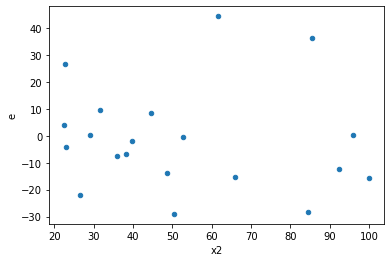

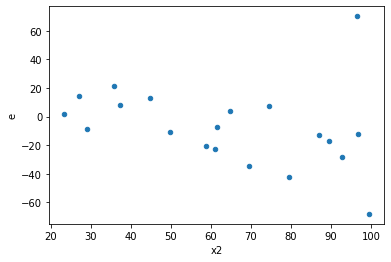

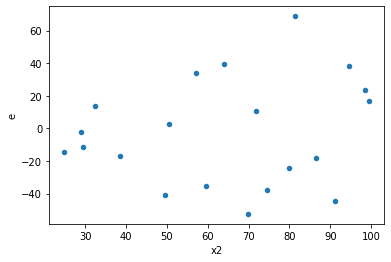

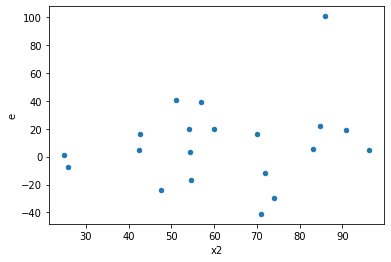

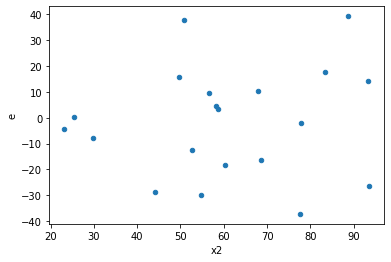

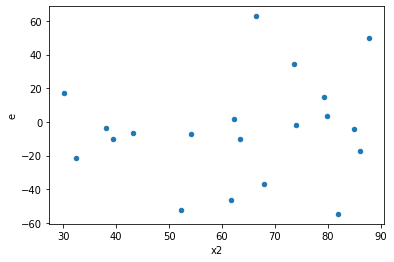

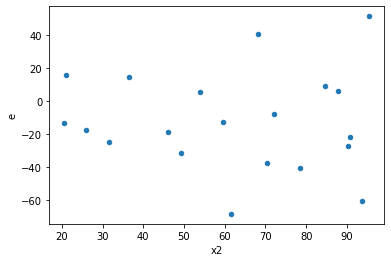

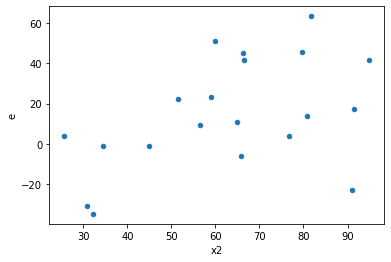

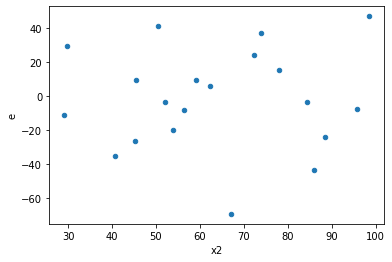

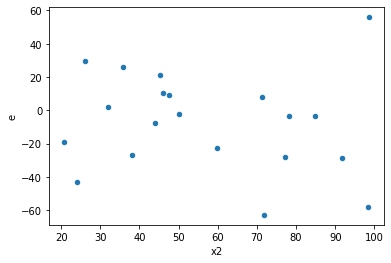

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,4.0,4.0,359.1004844960351,1598.1541647674755,89.77512112400878,399.5385411918689,4.450437227926161,0.17726686550151283,0.9113665672492436,0.08863343275075641,Reject001=1 : Homoscedasticity
1.0,4.0,4.0,975.1812608933548,9088.679748498542,243.7953152233387,2272.1699371246355,9.319990152571723,0.05269753021286916,0.9736512348935654,0.02634876510643458,Reject001=1 : Homoscedasticity
2.0,4.0,4.0,2859.560286978336,3451.820589569301,714.890071744584,862.9551473923252,1.2071158650817604,0.859653099316636,0.570173450341682,0.429826549658318,Reject001=1 : Homoscedasticity
3.0,4.0,4.0,212.24302315772957,2960.966561769086,53.06075578943239,740.2416404422715,13.950831069573617,0.025645436018215895,0.987177281990892,0.012822718009107947,Reject001=1 : Homoscedasticity
4.0,4.0,4.0,2512.3643277129104,2914.6620785342307,628.0910819282276,728.6655196335577,1.1601271544830225,0.889010802822523,0.5554945985887385,0.4445054014112615,Reject001=1 : Homoscedasticity
5.0,4.0,4.0,3865.2860228833715,7974.5623140067655,966.3215057208429,1993.6405785016914,2.0631234705001247,0.5002963640417555,0.7498518179791223,0.25014818202087774,Reject001=1 : Homoscedasticity
6.0,4.0,4.0,3189.968334352152,4283.659144725344,797.492083588038,1070.914786181336,1.3428531871603386,0.7820569320721122,0.6089715339639439,0.3910284660360561,Reject001=1 : Homoscedasticity
7.0,4.0,4.0,281.7130372030371,2826.948095568319,70.42825930075928,706.7370238920797,10.034850085872568,0.04629718757390067,0.9768514062130497,0.023148593786950333,Reject001=1 : Homoscedasticity
11.0,4.0,4.0,529.1920679018021,7011.590503339573,132.29801697545054,1752.8976258348932,13.249613757704049,0.02816670083960293,0.9859166495801985,0.014083350419801466,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,4.0,4.0,359.1004844960351,1598.1541647674755,89.77512112400878,399.5385411918689,4.450437227926161,0.17726686550151283,Reject001=1 : Homoscedasticity
1.0,4.0,4.0,975.1812608933548,9088.679748498542,243.7953152233387,2272.1699371246355,9.319990152571723,0.05269753021286916,Reject001=1 : Homoscedasticity
2.0,4.0,4.0,2859.560286978336,3451.820589569301,714.890071744584,862.9551473923252,1.2071158650817604,0.859653099316636,Reject001=1 : Homoscedasticity
3.0,4.0,4.0,212.24302315772957,2960.966561769086,53.06075578943239,740.2416404422715,13.950831069573617,0.025645436018215895,Reject001=1 : Homoscedasticity
4.0,4.0,4.0,2512.3643277129104,2914.6620785342307,628.0910819282276,728.6655196335577,1.1601271544830225,0.889010802822523,Reject001=1 : Homoscedasticity
5.0,4.0,4.0,3865.2860228833715,7974.5623140067655,966.3215057208429,1993.6405785016914,2.0631234705001247,0.5002963640417555,Reject001=1 : Homoscedasticity
6.0,4.0,4.0,3189.968334352152,4283.659144725344,797.492083588038,1070.914786181336,1.3428531871603386,0.7820569320721122,Reject001=1 : Homoscedasticity
7.0,4.0,4.0,281.7130372030371,2826.948095568319,70.42825930075928,706.7370238920797,10.034850085872568,0.04629718757390067,Reject001=1 : Homoscedasticity
8.0,4.0,4.0,3215.5018007063104,2879.601944901069,803.8754501765776,719.9004862252673,0.8955373448301418,0.9174190094309911,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      960
Reject001=0 : Heteroscedasticity     40
Name: Result_test, dtype: int64